# Computational Fluid Dynamics final project - Poiseuille flow data analysis

## Student's Info

| Name | Surname | Student ID | UniTs email | Personal email | Master course |
|:---:|:---:|:---:|:---:|:---:|:---:|
| Piero | Zappi | SM3600004 | `piero.zappi@studenti.units.it` | `piero.z.2001@gmail.com` | SDIC |

## Introduction

In this notebook we will analyze the data obtained from the simulation of the Poiseuille flow in a channel. The simulation was performed using the OpenFOAM software and the data was collected in the form of a CSV file. The data consists of the velocity profile of the fluid in the channel. The goal is to compare the simulation data with the analytical solution of the Poiseuille flow.

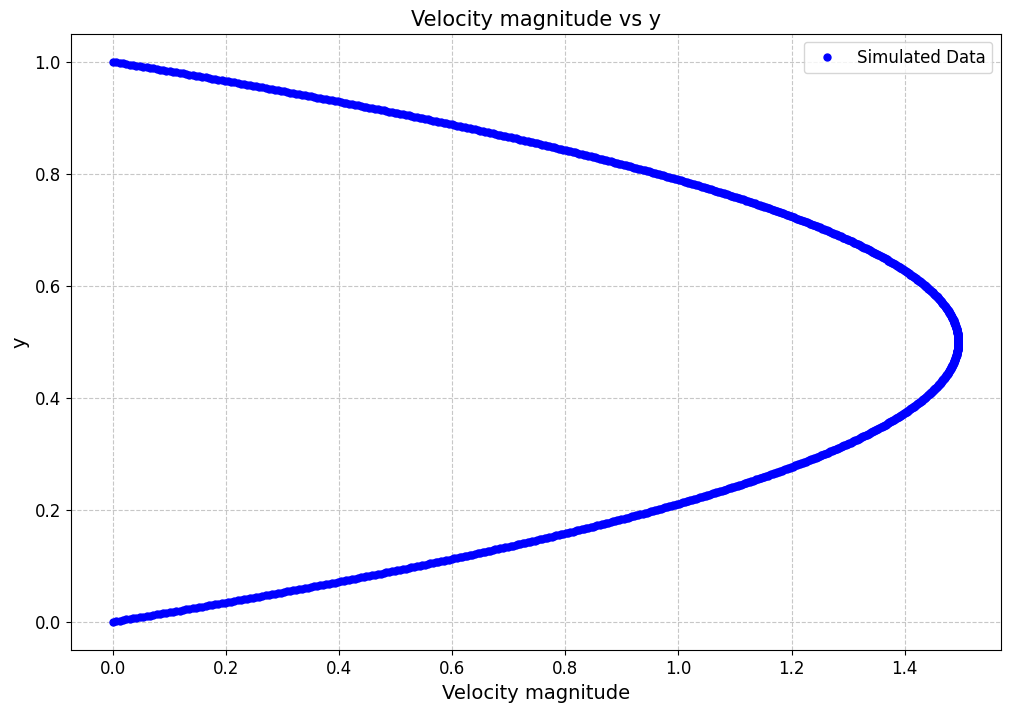

In [2]:
# Import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Import the csv file with the data from the simulation
data = pd.read_csv('U_Poiseuille.csv')

# Compute the velocity magnitude
data['velocity_magnitude'] = np.sqrt(data['U:0']**2 + data['U:1']**2 + data['U:2']**2)
velocity_magnitude = data['velocity_magnitude']
# Extract the y coordinates
y_coords = data['Points:1']

# Plot the velocity magnitude as a function of the y coordinate
plt.figure(figsize=(12, 8))
plt.plot(velocity_magnitude, y_coords, 'bo', markersize=5, label='Simulated Data')
plt.xlabel('Velocity magnitude', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.title('Velocity magnitude vs y', fontsize=15)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


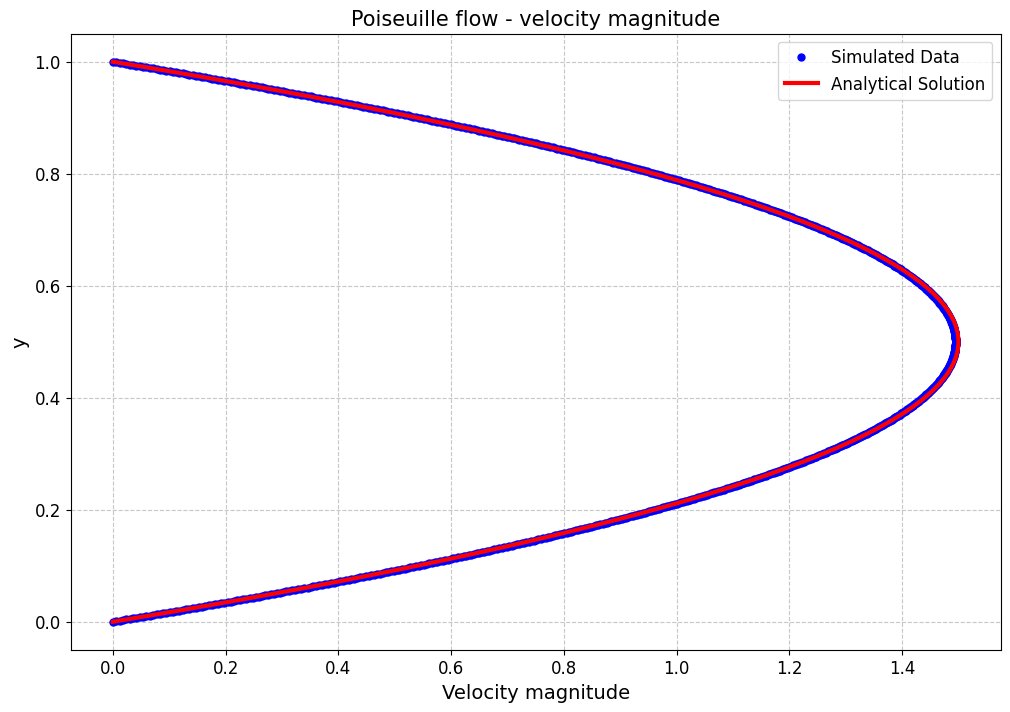

In [6]:
# Compute the analytical solution for the velocity magnitude in a Poiseuille flow
def analytical_solution(y, U_bar, h, nu):
    pressure_gradient = -(12 * U_bar * nu) / h**2
    velocity_magnitude = -(y/nu) * pressure_gradient * (h/2 - y/2)
    return velocity_magnitude

# Define the parameters
U_bar = 1
h = 1
nu = 0.01

# Define the y coordinates (from 0 to h)
y = np.linspace(0, h, 100)

# Compute the analytical solution
analytical_velocity_magnitude = analytical_solution(y, U_bar, h, nu)

# Plot the analytical solution and the simulated data
plt.figure(figsize=(12, 8))
plt.plot(velocity_magnitude, y_coords, 'bo', markersize=5, label='Simulated Data')
plt.plot(analytical_velocity_magnitude, y, 'r-', label='Analytical Solution',  linewidth=3)
plt.xlabel('Velocity magnitude', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.title('Poiseuille flow - velocity magnitude', fontsize=15)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

From the plot above, we can see that the velocity profile is parabolic, as expected for a Poiseuille flow. The velocity profile is symmetric with respect to the center of the channel, and the maximum velocity is located at the center of the channel. We can see that the analytical solution and the simulation data overlap almost perfectly, which means that the simulation results are accurate.